<a href="https://colab.research.google.com/github/taqiyyuddinhammamafiify/k-means_coffee-quality/blob/main/coffee_quality_plain_Libless.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

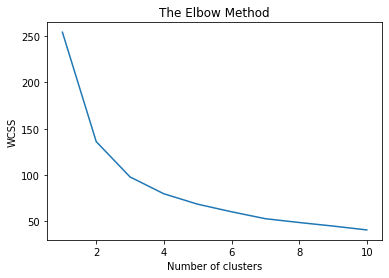

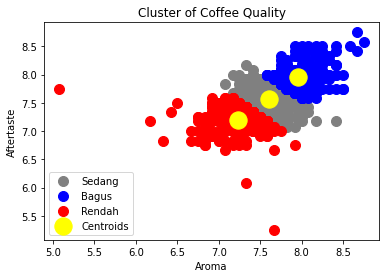

In [22]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/arabica_data_cleaned.csv')
#dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/robusta_data_cleaned.csv')
#dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/merged_data_cleaned.csv')
X = dataset.iloc[:1300,[20, 23]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Step 1
k = 3
clusters = {}
for i in range(k):
  clusters[i] = []

# Step 2
centroids = {}
for i in range(k):
  centroids[i] = X[i]

# Step 3
for data in X:
  euc_dist = []
  for j in range(k):
    euc_dist.append(np.linalg.norm(data - centroids[j]))
  clusters[euc_dist.index(min(euc_dist))].append(data)

# Important function
def recalculate_clusters(X, centroids, k):
    # Initiate empty clusters
    clusters = {}
    # Set the range for value of k (number of centroids)
    for i in range(k):
        clusters[i] = []
    for data in X:
        euc_dist = []
        for j in range(k):
            euc_dist.append(np.linalg.norm(data - centroids[j]))
        # Append the cluster of data to the dictionary
        clusters[euc_dist.index(min(euc_dist))].append(data)
    return clusters
    
def recalculate_centroids(centroids, clusters, k):
    for i in range(k):
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'grey', label = 'Sedang')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Bagus')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Rendah')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of Coffee Quality')
plt.xlabel('Aroma')
plt.ylabel('Aftertaste')
plt.legend()
plt.show()